In [3]:
import numpy as np 
import pandas as pd 
import re
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [5]:
data=pd.read_csv("C:/Users/suraj/Downloads/flipkart_review_data_2022_02.csv")

In [7]:
data.head()

,reviewDescription,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Very good product,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Nice and super picture quality.and sound also ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,This is excellent picture qualityUltimate soun...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Nice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Don't go with the negative reviews. Just go fo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
data1=data.drop(['Unnamed: 1','Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8'],axis=1)

In [18]:
data1

,reviewDescription
0,Very good product
1,Nice and super picture quality.and sound also ...
2,This is excellent picture qualityUltimate soun...
3,Nice
4,Don't go with the negative reviews. Just go fo...
...,...
338,Over all good ✌️🤩
339,For watching OTT content the best tv compared ...
340,wow
341,I got IPS panel in 50 inch everyone in reviews...


In [20]:
data1.shape

(343, 1)

In [23]:
data1.isna().sum()

reviewDescription    0
dtype: int64

In [26]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   reviewDescription  343 non-null    object
dtypes: object(1)
memory usage: 2.8+ KB


In [28]:
from textblob import TextBlob
from wordcloud import WordCloud

In [31]:
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+','', text)
    text = re.sub(r'#' , '' , text)
    text = re.sub(r'RT[\s]+' , '' , text)
    
    
    return text

data1['reviewDescription']=data1['reviewDescription'].apply(cleanTxt)

data1

,reviewDescription
0,Very good product
1,Nice and super picture quality.and sound also ...
2,This is excellent picture qualityUltimate soun...
3,Nice
4,Don't go with the negative reviews. Just go fo...
...,...
338,Over all good ✌️🤩
339,For watching OTT content the best tv compared ...
340,wow
341,I got IPS panel in 50 inch everyone in reviews...


In [33]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [35]:
data1['Subjectivity']=data1["reviewDescription"].apply(getSubjectivity)
data1['Polarity']= data1["reviewDescription"].apply(getPolarity)

In [37]:
data1.head()

,reviewDescription,Subjectivity,Polarity
0,Very good product,0.780000,0.910000
1,Nice and super picture quality.and sound also ...,0.673810,0.211905
2,This is excellent picture qualityUltimate soun...,0.583333,0.583333
3,Nice,1.000000,0.600000
4,Don't go with the negative reviews. Just go fo...,0.575143,0.556714


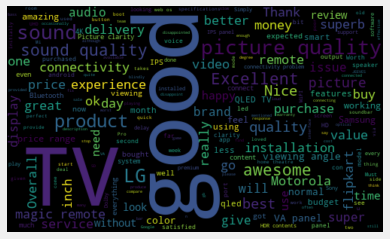

In [40]:
allwords=' '.join([twts for twts in data1["reviewDescription"]])
wordcloud= WordCloud(width=500, height=300 , random_state=20, max_font_size=119).generate(allwords)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('OFF')
plt.show()

In [42]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
    
    
data1['Analysis']=data1['Polarity'].apply(getAnalysis)

data1

,reviewDescription,Subjectivity,Polarity,Analysis
0,Very good product,0.780000,0.910000,Positive
1,Nice and super picture quality.and sound also ...,0.673810,0.211905,Positive
2,This is excellent picture qualityUltimate soun...,0.583333,0.583333,Positive
3,Nice,1.000000,0.600000,Positive
4,Don't go with the negative reviews. Just go fo...,0.575143,0.556714,Positive
...,...,...,...,...
338,Over all good ✌️🤩,0.600000,0.700000,Positive
339,For watching OTT content the best tv compared ...,0.335714,0.385714,Positive
340,wow,1.000000,0.100000,Positive
341,I got IPS panel in 50 inch everyone in reviews...,0.000000,0.000000,Neutral


In [45]:
m=1
sortedDF = data1.sort_values(by=['Polarity'])
for i in range(0 , sortedDF.shape[0]):
    if (sortedDF['Analysis'][i]=='Positive'):
        print(str(m) + ') '+sortedDF['reviewDescription'][i])
        print()
        m=m+1

1) Very good product

2) Nice and super picture quality.and sound also very good.but only one disappointed viewing angal not so good.

3) This is excellent picture qualityUltimate soundGood software qualityEverything is classic

4) Nice

5) Don't go with the negative reviews. Just go for it at the given price. Superb performance superb clarity and sound. Awesome connectivity.  Nothing is lacking in this model. I bought 55' model.  I think flipkart is a best plateform to buy electronic devices.  Thanks specially the seller, demo and installation team as the six movement wall mount provided is of very good quality, courier service and  above all,Flipkart for providing me the product at my door step.

6) Great TV for good price.Thank you LG for a wonderful experience

7) Overall ok

8) Picture quality is ok

9) excellent quality and sound feel like theatre

10) Very nice product. But comes without magic remote. I am still in a dilemma that i will get magic remote to purchase separately or

In [47]:
m=1
sortedDF = data1.sort_values(by=['Polarity'] , ascending='False')
for i in range(0 , sortedDF.shape[0]):
    if (sortedDF['Analysis'][i]=='Negative'):
        print(str(m) + ') '+sortedDF['reviewDescription'][i])
        print()
        m=m+1

1) This is not qled.. Sound ok, connectivity problem.. Only 8 gb ram.. Picture clarity just led  quality.. Games connectivity is worst experience..

2) Just imagine a TV with no physical buttons, stop connecting to its remote? How frustrating it is? It has been 2-3 months and the remote randomly stops working after every couple of minutes .. this smart thing proves garbage to me.. I missed my old analogue TV which had far better connectivity to it's remote :(

3) Viewing angles are bad. Colors start fading at even 45 degree angles. Android freezes sometimes.

4) This is not qled.. Sound ok, connectivity problem.. Only 8 gb ram.. Picture clarity just led  quality.. Games connectivity is worst experience..

5) Just imagine a TV with no physical buttons, stop connecting to its remote? How frustrating it is? It has been 2-3 months and the remote randomly stops working after every couple of minutes .. this smart thing proves garbage to me.. I missed my old analogue TV which had far better c

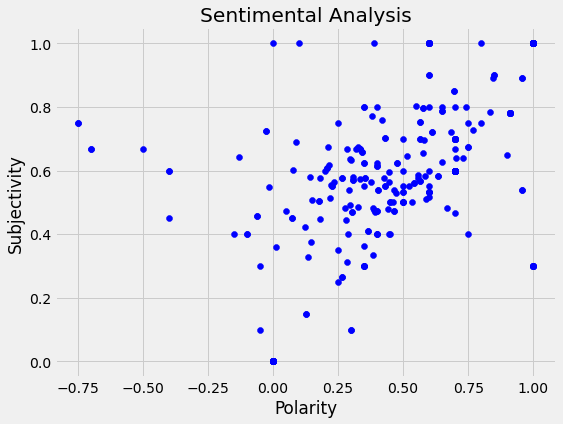

In [49]:
plt.figure(figsize=(8,6))
for i in range(0, data1.shape[0]):
    plt.scatter(data1['Polarity'][i], data1['Subjectivity'][i], color='blue')
    
plt.title('Sentimental Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [51]:
# positive tweets
ptweets=data1[data1.Analysis == 'Positive']
ptweets = ptweets['reviewDescription']

ptweets.shape[0]/data1.shape[0]*100

88.33819241982506

In [53]:
# negative tweets
ntweets=data1[data1.Analysis == 'Negative']
ntweets = ntweets['reviewDescription']

ntweets.shape[0]/data1.shape[0]*100

5.539358600583091

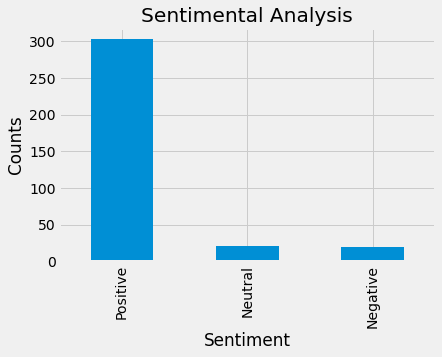

In [54]:
data1['Analysis'].value_counts()

plt.title('Sentimental Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
data1['Analysis'].value_counts().plot(kind='bar')
plt.show()